## K-Means 聚类

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 加载数据

In [3]:
# a general function to load iris data
def load_data(shuffled=True, test_rate=0):
    iris_sample = datasets.load_iris()
    features = iris_sample.data
    labels = iris_sample.target
    shuffle = np.insert(features, features.shape[1], values=labels, axis=1)
    if shuffled:
        print('打乱前')
        print(shuffle)
        np.random.shuffle(shuffle)
        print('-'*30)
        print('打乱后')
        print(shuffle)
    if test_rate > 0 and test_rate <= 0.5:
        test_size = round(features.shape[0] * test_rate)
        return (shuffle[:, :-1], shuffle[:, -1:].astype(np.int8), 
                shuffle[:test_size, :-1], shuffle[:test_size, -1:])
    return shuffle[:, :-1], shuffle[:, -1:].astype(np.int8)

### 绘制数据分布图
前三维特征作为三个坐标系，第四个用散点的大小进行区分

In [4]:
# plot the scatter diagram for 4-dimension pattern
def plot_scatter(x, y, z, s, c):
    c_arr = ['r', 'g', 'b']
    pc = []
    for row in c:
        pc.append(c_arr[row[0]])
    fig = plt.figure()
    ax = Axes3D(fig)
    
    # max size of point
    max_size = 500
    s = (s - s.min() + 1) / (s.max() - s.min()) * max_size
    # the 4th dimension feature is represented with size of scatter
    ax.scatter(x, y, z, c=pc, marker='.', s=s)
    plt.show()

### k-mean 聚类实现

In [5]:
# calculate the L2 norm of pattern1 and pattern2
def cal_dist(p1, p2):
    return np.linalg.norm(p1-p2)

"""
k_means clustering
:param data: patterns
:param k: the number of clusters
:param max_iter: maximum times of iteration
:param threshold: the acceptable minimum error
:return: k centers of clusters and the cluster for each pattern
"""
def k_means(data, k, max_iter=300, threshold=1e-10):
    if data.shape[0] < k:
        print('样本数小于{}'.format(k))
    
    # set the first k patterns as initial centers
    centers = data[:k, :].copy()
    # initialize clusters
    clusters = []
    for i in range(k):
        clusters.append([])
    # intialize labels
    labels = np.zeros(data.shape[0])
    # start clustering
    for iteration in range(300):
        # clear the cluster
        for i in range(k):
            clusters[i] = []
        for row in range(data.shape[0]):
            d = data[row]
            min_dist = np.inf
            min_cluster = 0
            # find a nearest center for each pattern
            for c in range(k):
                dist = cal_dist(centers[c], d)
                if dist < min_dist:
                    min_dist = dist
                    min_cluster = c
            labels[row] = min_cluster
            clusters[min_cluster].append(d)
        # whether the clustering is convergent
        conv = True
        for i in range(k):
            new_center = np.mean(clusters[i], axis=0)
            # if any center
            if cal_dist(new_center, centers[i]) > threshold:
                conv = False
            centers[i] = new_center
    
    return centers, labels

### 查看效果

----------------------------------------------------------------------------------------------------
样本数
150
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
样本点:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]


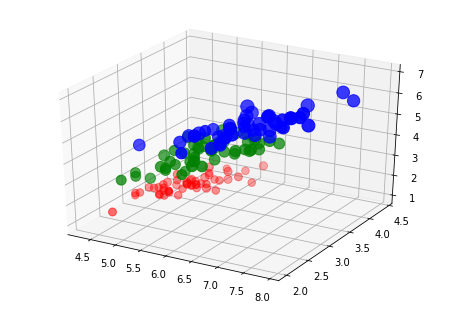

----------------------------------------------------------------------------------------------------
类中心:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
聚类结果:
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1.]
--------------------------------------------------------------------------------------

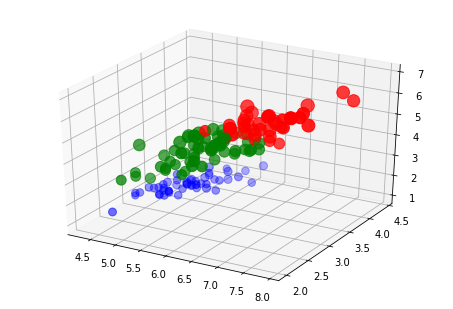

In [10]:
def print_block(desc='block', data=''):
    print('-'*100)
    print(desc)
    print(data)
    print('-'*100)

%matplotlib inline
# %matplotlib qt5
if __name__ == '__main__':
    features, labels = load_data(shuffled=False)
    print_block('样本数', features.shape[0])
    print_block('样本点:', features)
    print_block('类别:', labels.flatten())
    # the distribution of patterns
    plot_scatter(features[:, 0], features[:, 1], features[:, 2], features[:, 3], labels)
    # clustering using k_means
    centers, cluster_labels = k_means(features, 3)
    print_block('类中心:', centers)
    print_block('聚类结果:', cluster_labels)
    # plot the result of clustering
    cluster_labels = np.array(cluster_labels, dtype=np.int8).reshape(features.shape[0],1)
    plot_scatter(features[:, 0], features[:, 1], features[:, 2], features[:, 3], cluster_labels)

#     # 随机打乱数据，更改初始点的选取
#     features, labels = load_data(shuffled=True)
#     print_block('样本数', features.shape[0])
#     print_block('样本点:', features)
#     print_block('类别:', labels.flatten())
#     # the distribution of patterns
#     plot_scatter(features[:, 0], features[:, 1], features[:, 2], features[:, 3], labels)
#     # clustering using k_means
#     centers, cluster_labels = k_means(features, 3)
#     print_block('类中心:', centers)
#     print_block('聚类结果:', cluster_labels)
#     # plot the result of clustering
#     cluster_labels = np.array(cluster_labels, dtype=np.int8).reshape(features.shape[0],1)
#     plot_scatter(features[:, 0], features[:, 1], features[:, 2], features[:, 3], cluster_labels)